리니어 - 선형
레이어
신경망은 여러개의 논리레이어
레이어마다 W가 존재 
리니어 레이어 = 리니어 트랜스폼 - 선형 변환

행렬 형태의 데이터를 하나의 정수로 표현한다 -> 사각형의 정보가 집약된 하나의 정수
4차원을 1차원으로 - 사각형 1개를 정수한개로 (4,2)

(4,2)
4는 점의 갯수, 2는 2차원의 좌표(x,y)

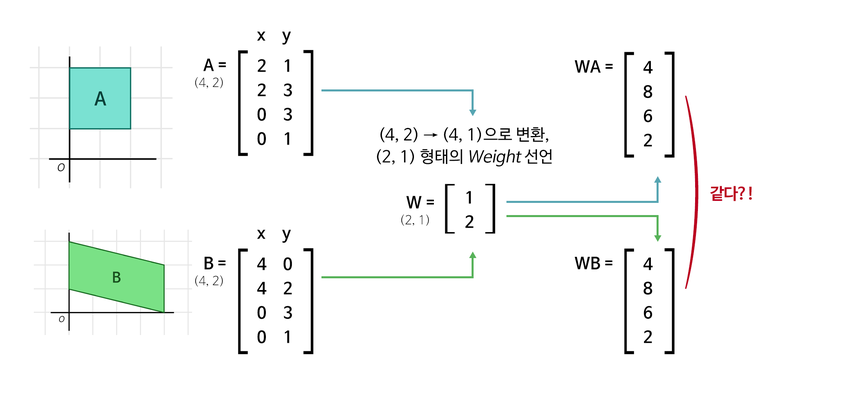

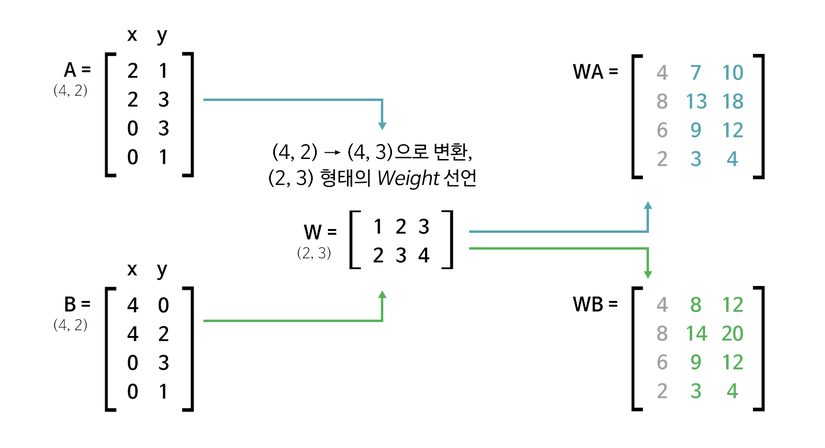
컨볼루션 -

In [10]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size, 4, 2))

print("1단계 연산 준비:", boxes.shape)

########
# Step 1: (4,2)차원인 boxes를 (4,3)으로 확장시키는 Linear Layer를 활용하세요.
# Enter Your Source
first_linear = tf.keras.layers.Dense(units=3, use_bias=False)
first_out = first_linear(boxes)
########

print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)

print("\n2단계 연산 준비:", first_out.shape)

1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 3)
1단계 Linear Layer의 Weight 형태: (2, 3)

2단계 연산 준비: (64, 4, 3)


In [11]:
# Dense = Linear
second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=-1)

print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Layer의 Weight 형태:", second_linear.weights[0].shape)

print("\n3단계 연산 준비:", second_out.shape)

2단계 연산 결과: (64, 4)
2단계 Linear Layer의 Weight 형태: (3, 1)

3단계 연산 준비: (64, 4)


In [23]:
third_linear = tf.keras.layers.Dense(units=1, use_bias=False)
third_out = third_linear(second_out)
third_out = tf.squeeze(third_out, axis=-1)
print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight 형태:", third_linear.weights[0].shape)

3단계 연산 결과: (64,)
3단계 Linear Layer의 Weight 형태: (4, 1)


In [24]:
total_params = first_linear.count_params() + second_linear.count_params() + third_linear.count_params()
print(total_params)

13
